In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df= pd.read_csv("/content/sample_data/statEV.csv")

In [ ]:
df.head()

,state,Total Ev,Total non Ev,Average Income(INR),BusinessRanking
0,Andaman & Nicobar Island,162,"1,46,945",218000,22
1,Arunachal Pradesh,20,"2,52,965",192360,29
2,Assam,"64,766","46,77,053",86857,20
3,Bihar,"83,335","1,04,07,078",43605,26
4,Chandigarh,"2,812","7,46,881",292977,29


In [ ]:
df.shape

(32, 5)

In [ ]:
df.isnull().sum()

state                  0
Total Ev               0
Total non Ev           0
Average Income(INR)    0
BusinessRanking        0
dtype: int64

In [ ]:
df.describe()

,Average Income(INR),BusinessRanking
count,32.000000,32.000000
mean,177163.593750,19.343750
std,95579.201201,8.764332
min,43605.000000,2.000000
25%,104408.000000,11.750000
50%,166296.000000,21.000000
75%,214115.750000,28.250000
max,431351.000000,29.000000


In [ ]:
df["Total Ev"]=df["Total Ev"].apply(lambda x: x.replace(",",""))
df["Total non Ev"]=df["Total non Ev"].apply(lambda x: x.replace(",",""))

In [ ]:
df["Total non Ev"] = pd.to_numeric(df['Total non Ev'])
df["Total non Ev"].dtypes

dtype('int64')

In [ ]:
df["Total Ev"] = pd.to_numeric(df['Total Ev'], errors='coerce')
df['Total Ev'].dtypes

dtype('int64')

In [ ]:
df['EV_percentage']= df['Total Ev']/(df['Total Ev']+df['Total non Ev'])*100

In [ ]:
df.head()

,state,Total Ev,Total non Ev,Average Income(INR),BusinessRanking,EV_percentage
0,Andaman & Nicobar Island,162,146945,218000,22,0.110124
1,Arunachal Pradesh,20,252965,192360,29,0.007906
2,Assam,64766,4677053,86857,20,1.365847
3,Bihar,83335,10407078,43605,26,0.794392
4,Chandigarh,2812,746881,292977,29,0.375087


[]

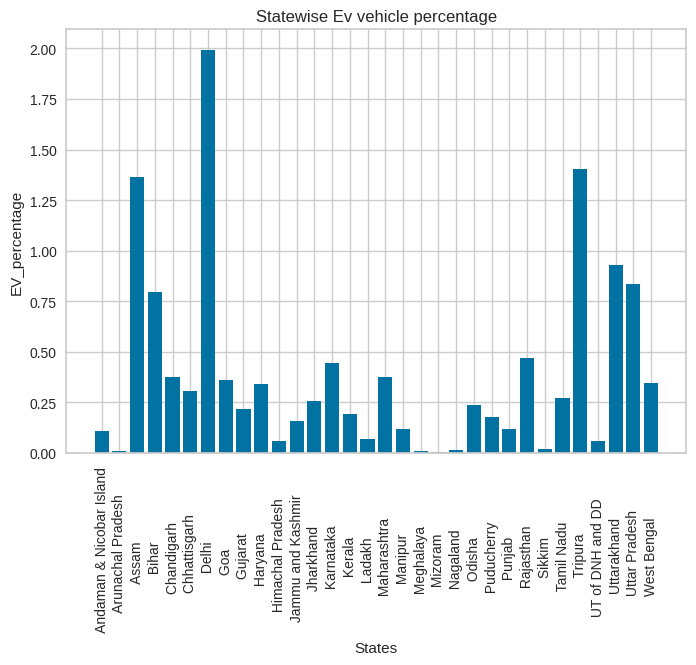

In [ ]:

plt.bar(df['state'] , df['EV_percentage'])
plt.xticks(rotation='vertical')
plt.title("Statewise Ev vehicle percentage")
plt.xlabel("States")
plt.ylabel("EV_percentage")
plt.plot()

In [ ]:
#Finding Top 5 states of Ev
TopStates = df.sort_values(by='EV_percentage' , ascending=False)

In [ ]:
TopStates.head(5)

,state,Total Ev,Total non Ev,Average Income(INR),BusinessRanking,EV_percentage
6,Delhi,156393,7685600,344136,12,1.994302
27,Tripura,9262,650026,119789,29,1.404849
2,Assam,64766,4677053,86857,20,1.365847
29,Uttarakhand,31008,3312041,182698,11,0.927537
30,Uttar Pradesh,337180,40092490,61666,2,0.833991


So we can see that Top 5 states having EV's are - Delhi , Tripura , Assam , Uttarakhand , Uttar Pradesh


[]

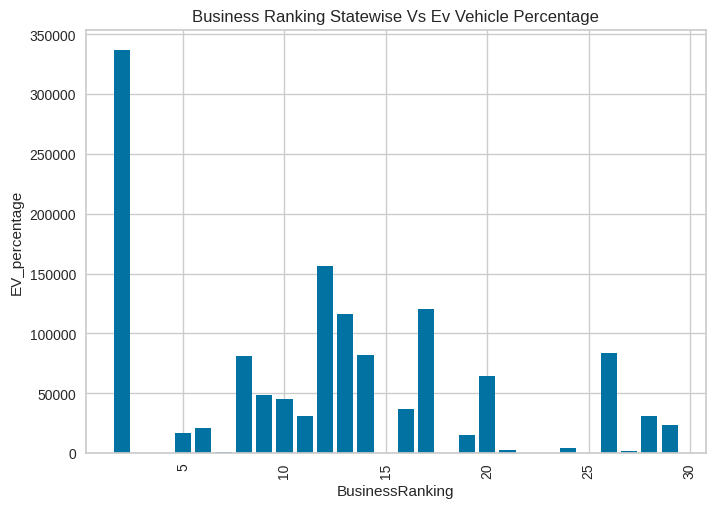

In [ ]:
plt.bar(df['BusinessRanking'] , df['Total Ev'])
plt.xticks(rotation='vertical')
plt.title("Business Ranking Statewise Vs Ev Vehicle Percentage")
plt.xlabel("BusinessRanking")
plt.ylabel("EV_percentage")
plt.plot()

so we can see that city with high Business Ranking have the highest number of EV


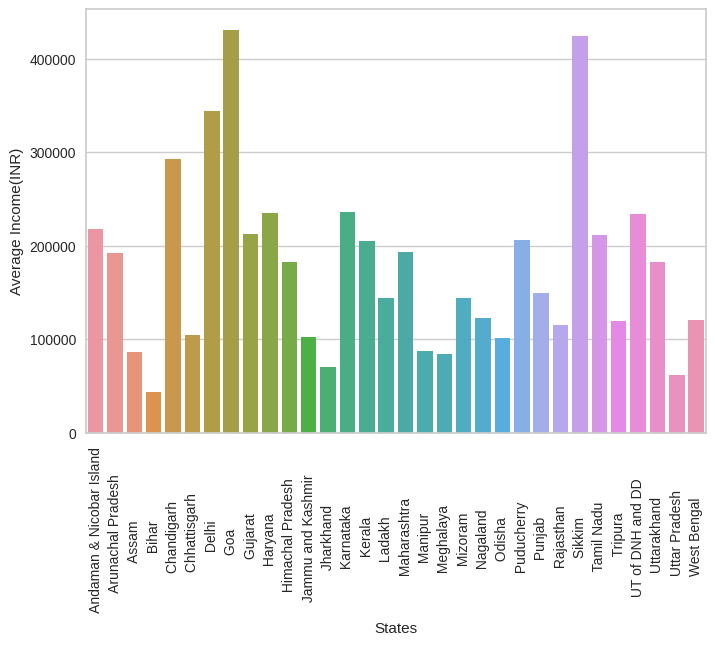

In [ ]:
sns.barplot(x=df['state'],y=df['Average Income(INR)'])
plt.xticks(rotation='vertical')
plt.xlabel("States")

sns.despine(right=False, top=False)

In [ ]:
df2= pd.read_excel("/content/sample_data/EV_market_india_data.xlsx")
df2.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
df2.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [ ]:
df2.shape

(103, 15)

In [ ]:
df2['Brand'].value_counts()


Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Renault        5
Porsche        5
Kia            5
BMW            4
Ford           4
Smart          3
Byton          3
Mercedes       3
Hyundai        3
Opel           3
Fiat           2
Peugeot        2
Honda          2
Mini           1
DS             1
Polestar       1
Sono           1
Lucid          1
Jaguar         1
Citroen        1
Aiways         1
MG             1
Lightyear      1
SEAT           1
CUPRA          1
Lexus          1
Mazda          1
Volvo          1
Name: Brand, dtype: int64

Text(0.5, 1.0, 'Total EV in Different Brands')

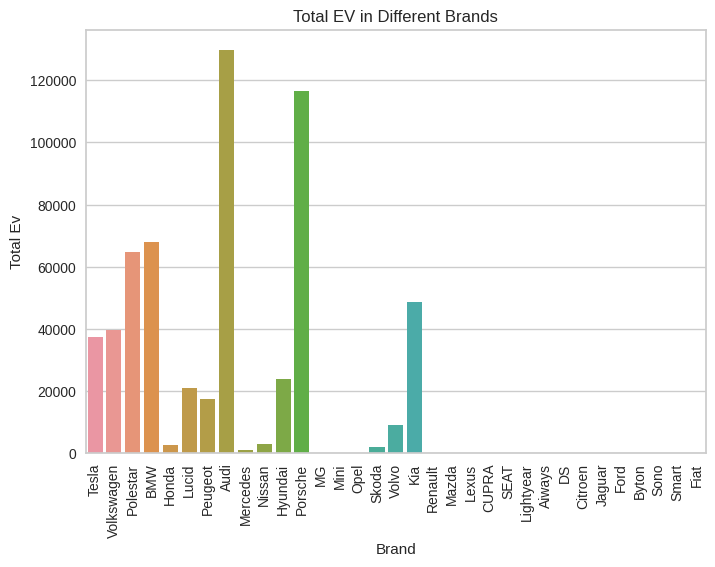

In [ ]:
sns.barplot(x=df2['Brand'],y=df['Total Ev'],errorbar=None)
plt.xticks(rotation='vertical')
sns.despine(right=False, top=False)
plt.title("Total EV in Different Brands")

Text(0.5, 1.0, 'Total Non EV in Different Brands')

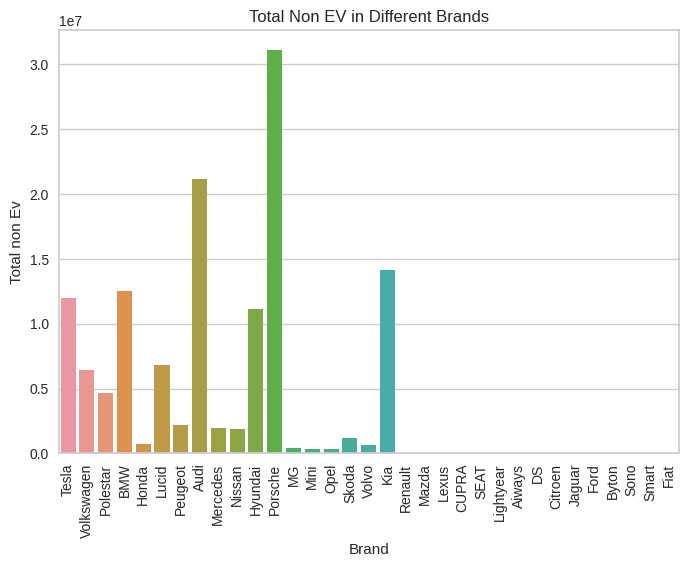

In [ ]:
sns.barplot(x=df2['Brand'],y=df['Total non Ev'],errorbar=None)
plt.xticks(rotation='vertical')
sns.despine(right=False, top=False)
plt.title("Total Non EV in Different Brands")

In [ ]:
df2['Model'].value_counts()

e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh                    1
e-tron 50 quattro                1
e-2008 SUV                       1
i3 120 Ah                        1
M-Byte 95 kWh 2WD                1
Name: Model, Length: 102, dtype: int64

[]

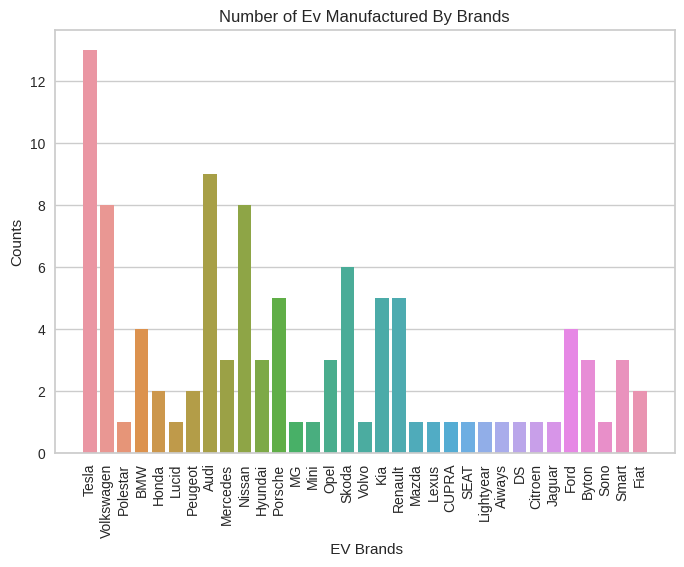

In [ ]:
sns.countplot(x=df2['Brand'])
plt.xticks(rotation='vertical')
plt.xlabel(" EV Brands")
plt.ylabel("Counts")
plt.title("Number of Ev Manufactured By Brands")
plt.plot()

In [ ]:
df2['AccelSec']=pd.to_numeric(df2['AccelSec'])

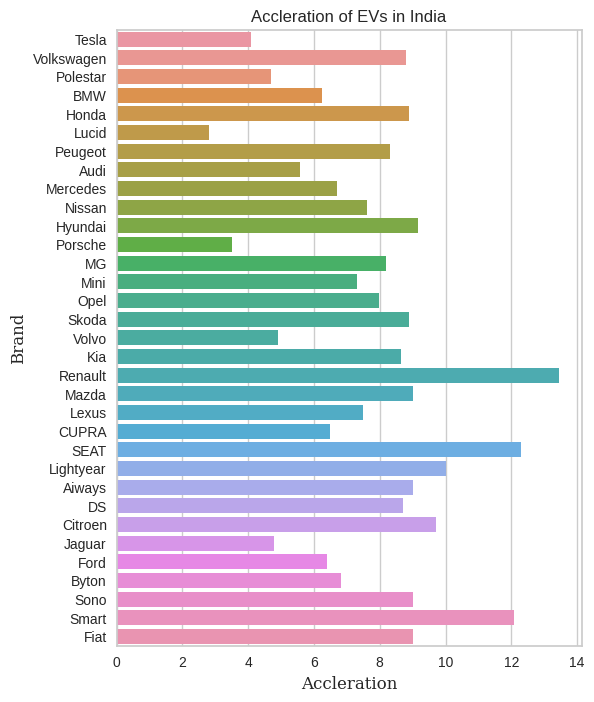

In [ ]:
#Acceleration Speed of Different Ev
plt.figure(figsize=(6, 8))
sns.barplot(data=df2,  y='Brand', x='AccelSec' , errorbar=None)

plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India')
plt.show()

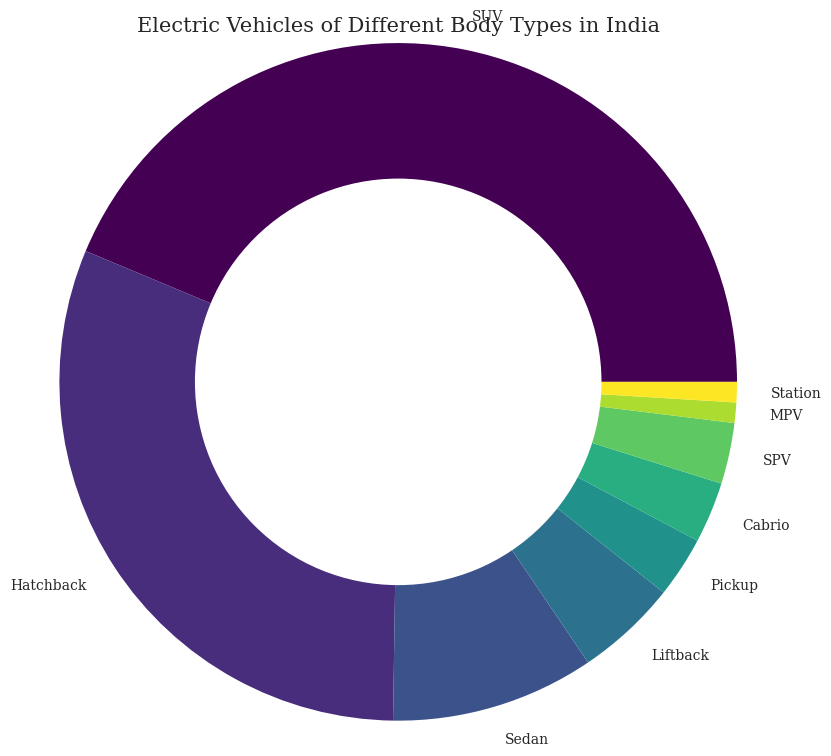

In [ ]:
#Distribution of BodyTypes in Ev

x = df2['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

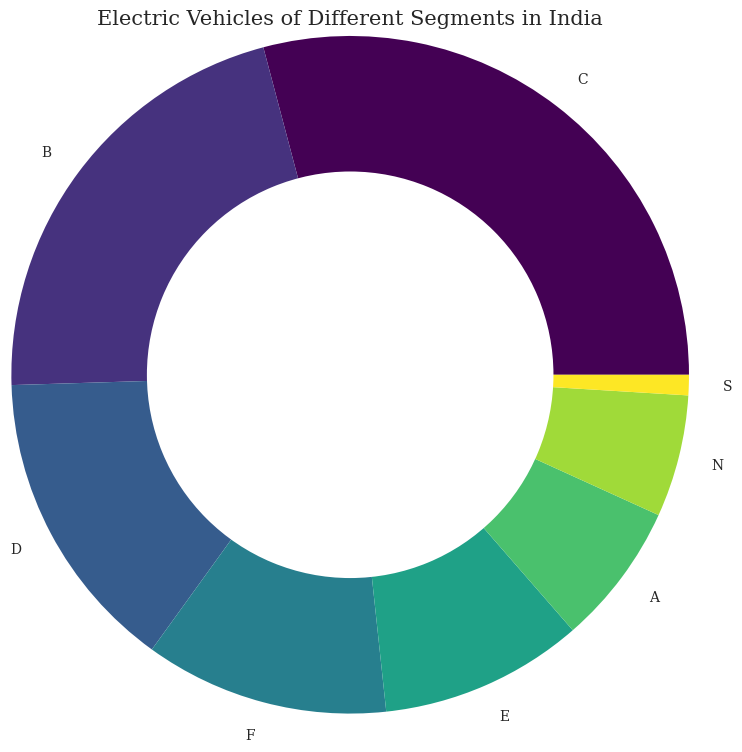

In [ ]:
#Analysis of different Segments of EV
x = df2['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

[]

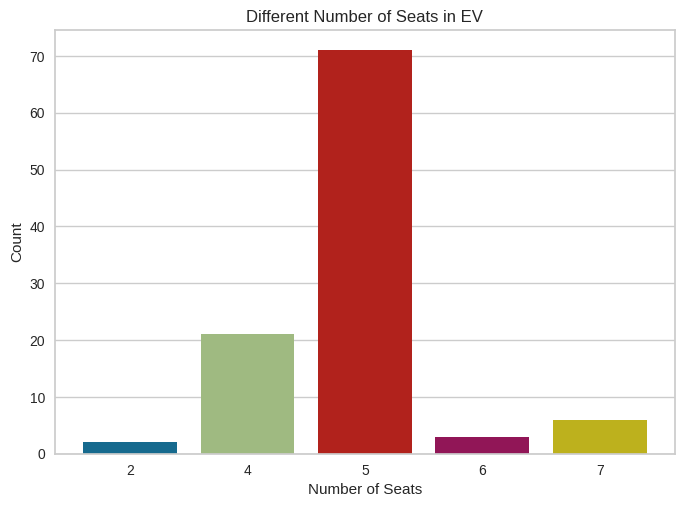

In [ ]:
#Analysis of Seats in EV
sns.countplot(x=df2['Seats'])
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Different Number of Seats in EV")
plt.plot()

Text(0.5, 1.0, 'Distribution Of Seats In Different Brands')

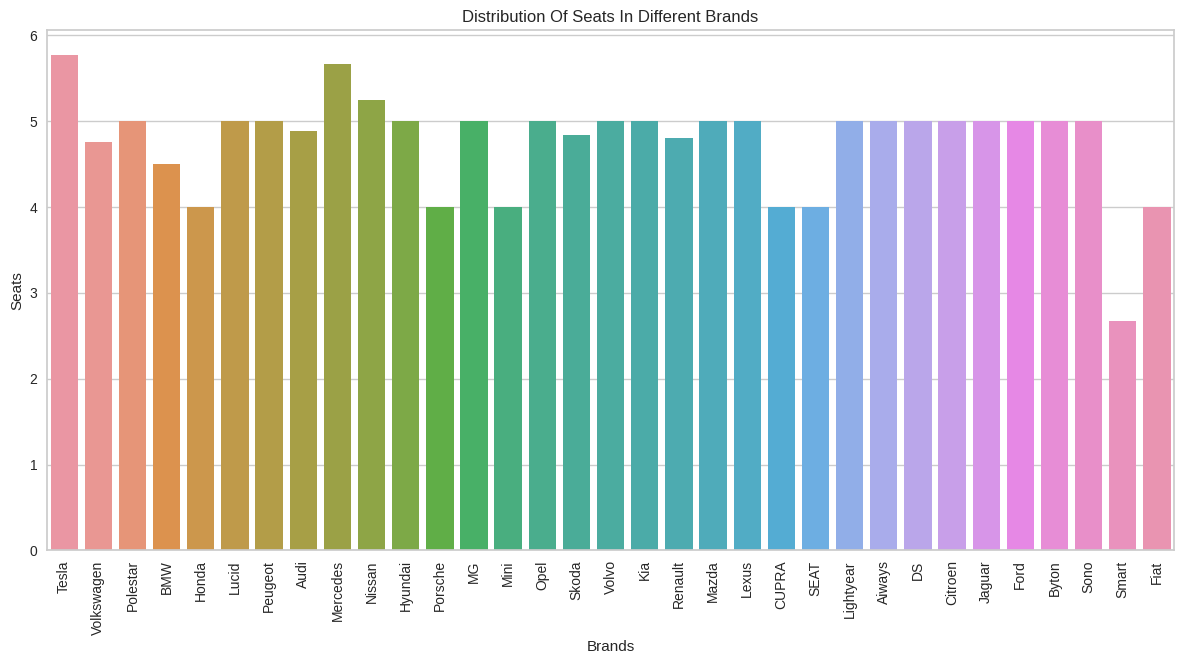

In [ ]:
sns.catplot(kind='bar',data=df2, x='Brand', y='Seats' ,errorbar=None, height=6 , aspect=2)
plt.xticks(rotation='vertical')
sns.despine(right=False, top=False)
plt.xlabel("Brands")
plt.ylabel("Seats")
plt.title("Distribution Of Seats In Different Brands")

Text(0.5, 1.0, 'Availabel of PlugTypes in EV')

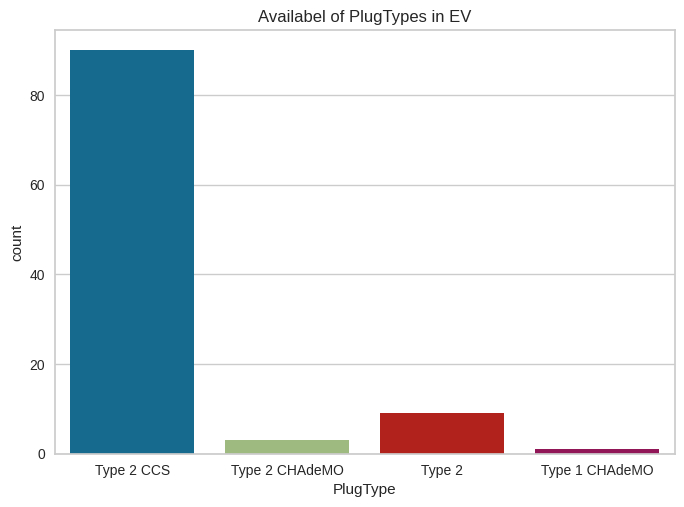

In [ ]:
sns.countplot(x=df2['PlugType'])
plt.title("Availabel of PlugTypes in EV")

Text(0, 0.5, 'Price')

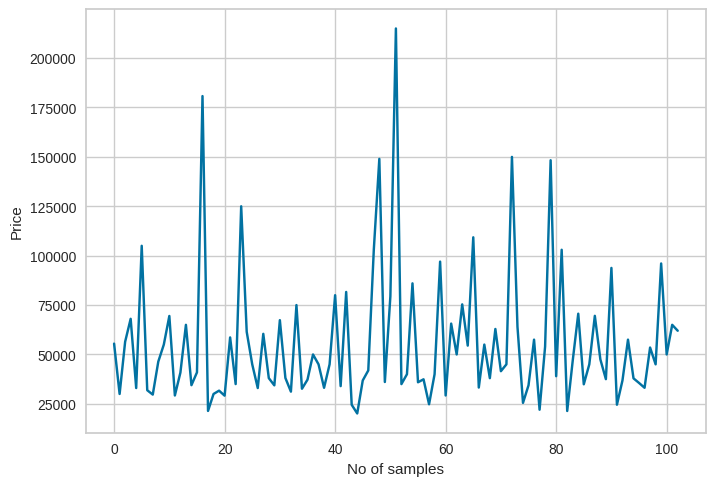

In [ ]:
#price distribution of EV
plt.plot(df2['PriceEuro'])
plt.xlabel("No of samples")
plt.ylabel("Price")

Text(0.5, 1.0, 'Brand Wise Speed Comparison in EV')

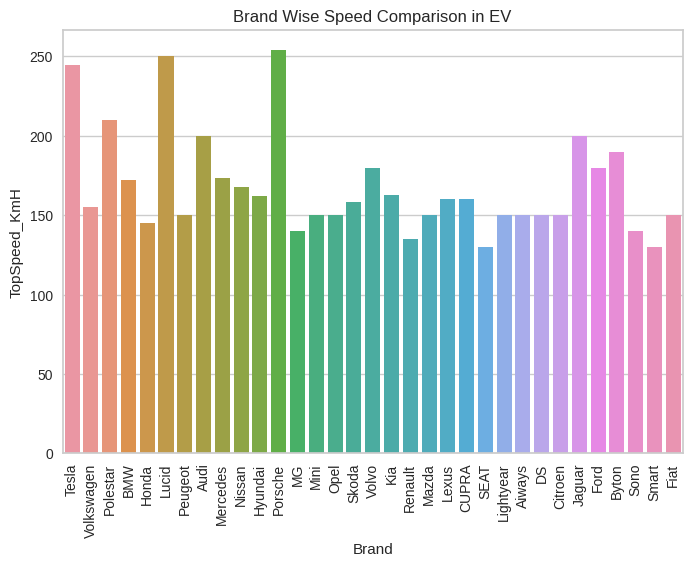

In [ ]:
sns.barplot(data=df2,x='Brand',y='TopSpeed_KmH',errorbar=None)
plt.xticks(rotation='vertical')
sns.despine(right=False, top=False)
plt.title("Brand Wise Speed Comparison in EV")

Text(0.5, 1.0, 'Brand-wise Analysis of the Range Parameter')

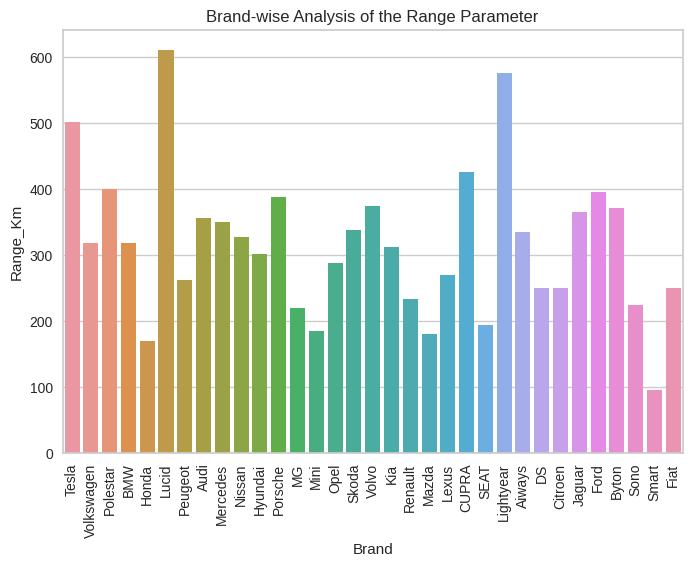

In [ ]:
sns.barplot(data=df2,x='Brand',y='Range_Km',errorbar=None)
plt.xticks(rotation='vertical')
sns.despine(right=False, top=False)
plt.title('Brand-wise Analysis of the Range Parameter')

<ipython-input-36-5555984ff49c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

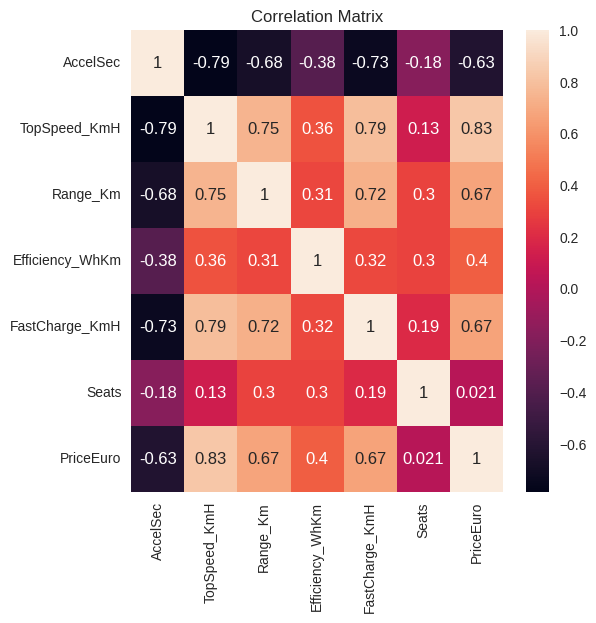

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=df2.corr(),annot=True)
plt.title("Correlation Matrix")

In [ ]:
df2['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Model Building using Kmeans
df2['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)


df2['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [ ]:
x = df2[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]



In [ ]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
pca=PCA(n_components=9)
x_pca= pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


In [ ]:
df_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']].std()



PC1    2.174294
PC2    1.078046
PC3    1.004521
PC4    0.825607
PC5    0.736227
PC6    0.606592
PC7    0.500922
PC8    0.480899
PC9    0.340051
dtype: float64

<ipython-input-43-b27eca849975>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_pca, x='PC1', y='PC2',palette='deep')


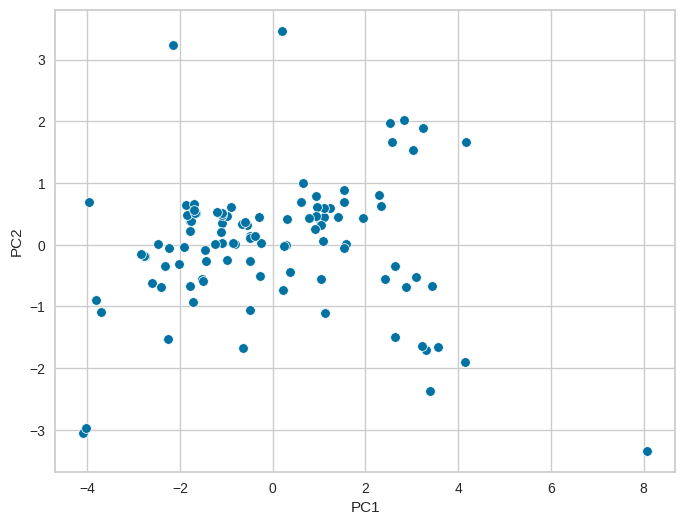

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2',palette='deep')
plt.show()

In [ ]:
#Segment Extraction using KMeans Clustering
wcss = []

for i in range(1, 10):
  kmean = KMeans(n_clusters=i)
  kmean.fit(x_pca)
  wcss.append(kmean.inertia_)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[926.9999999999995,
 589.4490197740854,
 505.1849002717357,
 432.237529813412,
 387.58412966098797,
 344.31642413098075,
 314.05399444199725,
 275.5058305942447,
 261.56776747487856]

Text(0.5, 1.0, 'Elbow Method for finding K value')

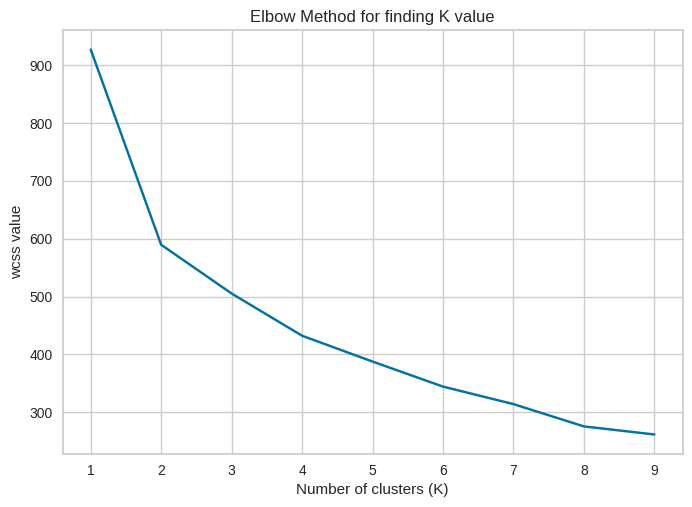

In [ ]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters (K)")
plt.ylabel("wcss value")
plt.title("Elbow Method for finding K value")

In [ ]:
kmean= KMeans(n_clusters=4)
y_means=kmean.fit_predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([3, 0, 3, 2, 2, 1, 0, 0, 2, 3, 3, 2, 2, 3, 0, 2, 1, 2, 0, 2, 2, 3,
       2, 1, 1, 2, 2, 3, 0, 0, 3, 2, 2, 3, 2, 2, 2, 0, 0, 3, 3, 2, 3, 2,
       2, 2, 2, 1, 3, 0, 3, 1, 2, 2, 3, 2, 2, 0, 2, 1, 0, 3, 3, 3, 0, 1,
       2, 3, 0, 3, 2, 3, 1, 3, 2, 2, 3, 0, 3, 1, 2, 3, 0, 2, 3, 2, 3, 3,
       3, 2, 3, 0, 0, 3, 2, 2, 2, 0, 2, 3, 3, 3, 3], dtype=int32)

In [ ]:
x_pca[y_means==2,0]

array([ 0.2910179 , -2.60267879,  0.22916444, -1.65519528, -0.4803804 ,
       -0.4814185 , -2.76455754, -1.78203546, -1.0840347 , -1.78279913,
       -0.26031198, -1.08724272, -0.54425738, -1.8792535 , -1.69429261,
       -0.65565836, -0.89594456, -1.76897352, -2.78164309, -2.83218914,
       -0.59078003, -0.98093514, -1.09291556, -0.48930592, -2.4107079 ,
       -1.09409883, -1.19653278, -2.14355078, -1.71744192, -1.85369669,
       -1.66880427, -0.82355963, -0.37224417, -1.53434456, -1.104496  ,
       -1.49992046, -0.8627113 , -1.68775253, -0.29717034])

In [ ]:
df2['clusters'] = kmean.labels_

In [ ]:
pd.Series(kmean.labels_).value_counts()

2    39
3    35
0    19
1    10
dtype: int64

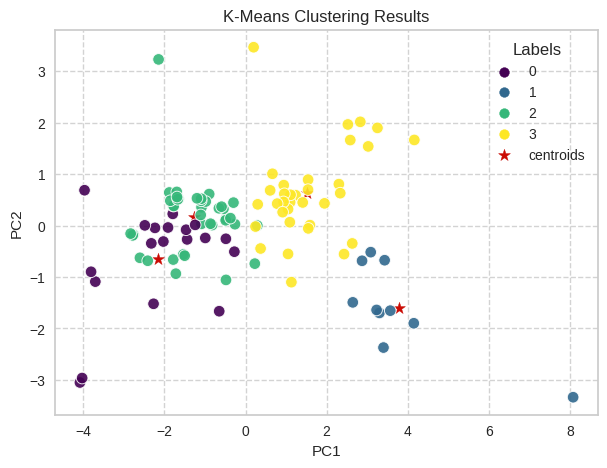

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results')
plt.show()

Conclusion:
Observation 1: In the Indian automobile market, Tesla, Audi, Volkswagen, Nissan, and Skoda have the most extensive range of electric vehicle (EV) models.

Observation 2: The majority of body segments fall into categories B and C, while segments S and A represent the minority.

Observation 3: SUVs and hatchbacks make up the majority of body types, while station wagons and MPVs are less common.

Observation 4: When considering the seating capacity, Tesla, Mercedes, and Nissan offer the most seats, while Smart provides the fewest.

Observation 5: The market is predominantly filled with 5-seater electric vehicles (EVs), while there are fewer 2-seater EVs available.

Observation 6: Electric vehicles with the 'Type 2 CCS' plus type appear to be the prevailing choice in the market.

Observation 7: When considering the speed parameter, Tesla, Lucid, and Porsche electric vehicles stand out as top performers, while Renault, Smart, and SEAT do not achieve the same level of performance.

Observation 8: In terms of acceleration, Renault, Seat, and Smart electric vehicles demonstrate top-notch performance, while Tesla, Lucid, and Porsche do not achieve the same level of acceleration.

Observation 9: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

